In [2]:
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/home/rosselli/fisher_howlett/')
from fisher import fisher_class as fc
from fisher import utils as ut

#parameter file with the info for the forecast, check params.yml for description
param_file = '/home/rosselli/fisher_howlett/example_files/params.yml'



In [ ]:
#initialize the class and run the forecast in redshift bin as defined in the param_file
# for the moment verbose = True in param_file so the code will print a lot of stuff
c = fc.Fisher(pp)
c.compute_fisher_zbin()
c.compute_fisher_tot()

In [2]:
df = pd.DataFrame.from_dict(c.data,orient='index')
df

,zbin,zeff,beta_eff,beta_eff_err,fs8_eff,fs8_eff_err,sigma_g,sigma_g_err,sigma_u,sigma_u_err
0,"[0.0, 0.05]",0.037371,0.401412,0.063569,0.438749,0.068872,4.24,1.882140,13.0,1.882140
1,"[0.05, 0.1]",0.080107,0.409786,0.041028,0.447903,0.043767,4.24,0.841774,13.0,0.841774
2,"[0.1, 0.15000000000000002]",0.127999,0.417652,0.035764,0.456501,0.037957,4.24,0.613954,13.0,0.613954
3,"[0.15000000000000002, 0.2]",0.177056,0.424134,0.030165,0.463586,0.031960,4.24,0.488550,13.0,0.488550
4,"[0.2, 0.25]",0.226546,0.429166,0.026551,0.469085,0.028098,4.24,0.415108,13.0,0.415108
5,"[0.25, 0.30000000000000004]",0.276175,0.432810,0.023863,0.473068,0.025231,4.24,0.365341,13.0,0.365341
6,"[0.30000000000000004, 0.35000000000000003]",0.325929,0.435180,0.021593,0.475659,0.022817,4.24,0.327039,13.0,0.327039
7,"[0.35000000000000003, 0.4]",0.375686,0.436393,0.019912,0.476985,0.021026,4.24,0.299696,13.0,0.299696
8,"[0.4, 0.45]",0.425260,0.436573,0.018830,0.477182,0.019856,4.24,0.283011,13.0,0.283011
9,"[0.45, 0.5]",0.474713,0.435848,0.018378,0.476389,0.019333,4.24,0.277756,13.0,0.277756


In [3]:
import numpy as np
xx = np.linspace(0.,0.5,100)
growth = ut.compute_growth_spline(c.cosmo_params['Om_0'],c.cosmo_params['gammaval'])  
sigma8 = c.cosmo_params['sigma_8_0'] * growth(xx)
f,_,_ = ut.compute_f_beta(xx,c.cosmo_params)

In [4]:
c.data_tot

{'beta_eff': 0.43597705344900856,
 'beta_eff_err': 0.007818039557075602,
 'fs8_eff': 0.47653001768142955,
 'fs8_eff_err': 0.00825479374981857,
 'sigma_g': 4.24,
 'sigma_g_err': 0.12025034529910697,
 'sigma_u': 13.0,
 'sigma_u_err': 0.12025034529910697,
 'zeff': 0.3530579651485504}

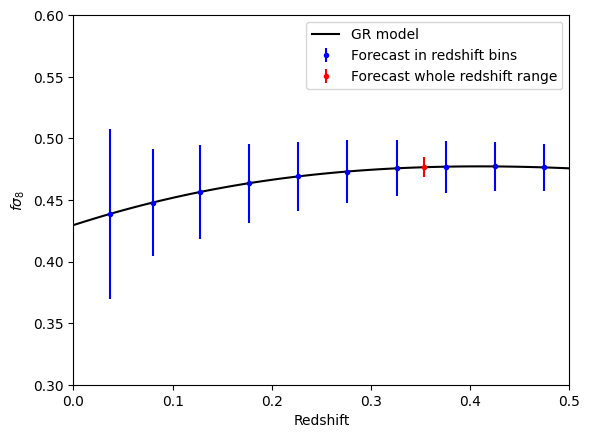

In [7]:
plt.figure(dpi=100)
plt.plot(xx,f*sigma8, c='k', label='GR model')
plt.errorbar(df.zeff,df.fs8_eff,df.fs8_eff_err,marker='.',linestyle='',color='b',label='Forecast in redshift bins')
plt.errorbar(c.data_tot['zeff'],c.data_tot['fs8_eff'],c.data_tot['fs8_eff_err'],marker='.',linestyle='',color='r',label='Forecast whole redshift range')
plt.xlabel('Redshift')
plt.ylabel(r'$f \sigma_8$')
plt.xlim(0.,0.5)
plt.ylim(0.3,0.6)
plt.legend()
plt.show()